In [5]:
import numpy as np
import matplotlib.pyplot as plt
import Algoritmosnumericos as Alg
plt.style.use('dark_background')
%matplotlib widget
%config InlineBackend.figure_format = 'retina'
%matplotlib widget

# ------------------------------------------------------------------------------


## Problema 1

Demuestre los siguientes resultados:

a) Teorema de euler

$$ e^{i\theta} = \cos{}\theta + i\sin{\theta}$$

b) Segunda derivada de la función $f(x)$ en el punto $x_0$, con paso a la derecha e izquierda de magnitud $h$.

$$ f''(x_0) = \frac{f(x_0+h)+f(x_0-h)-2f(x_0)}{h^2} $$

¿Cuál es el orden del error de la aproximación?

# SOLUCIÓN PROBLEMA 1

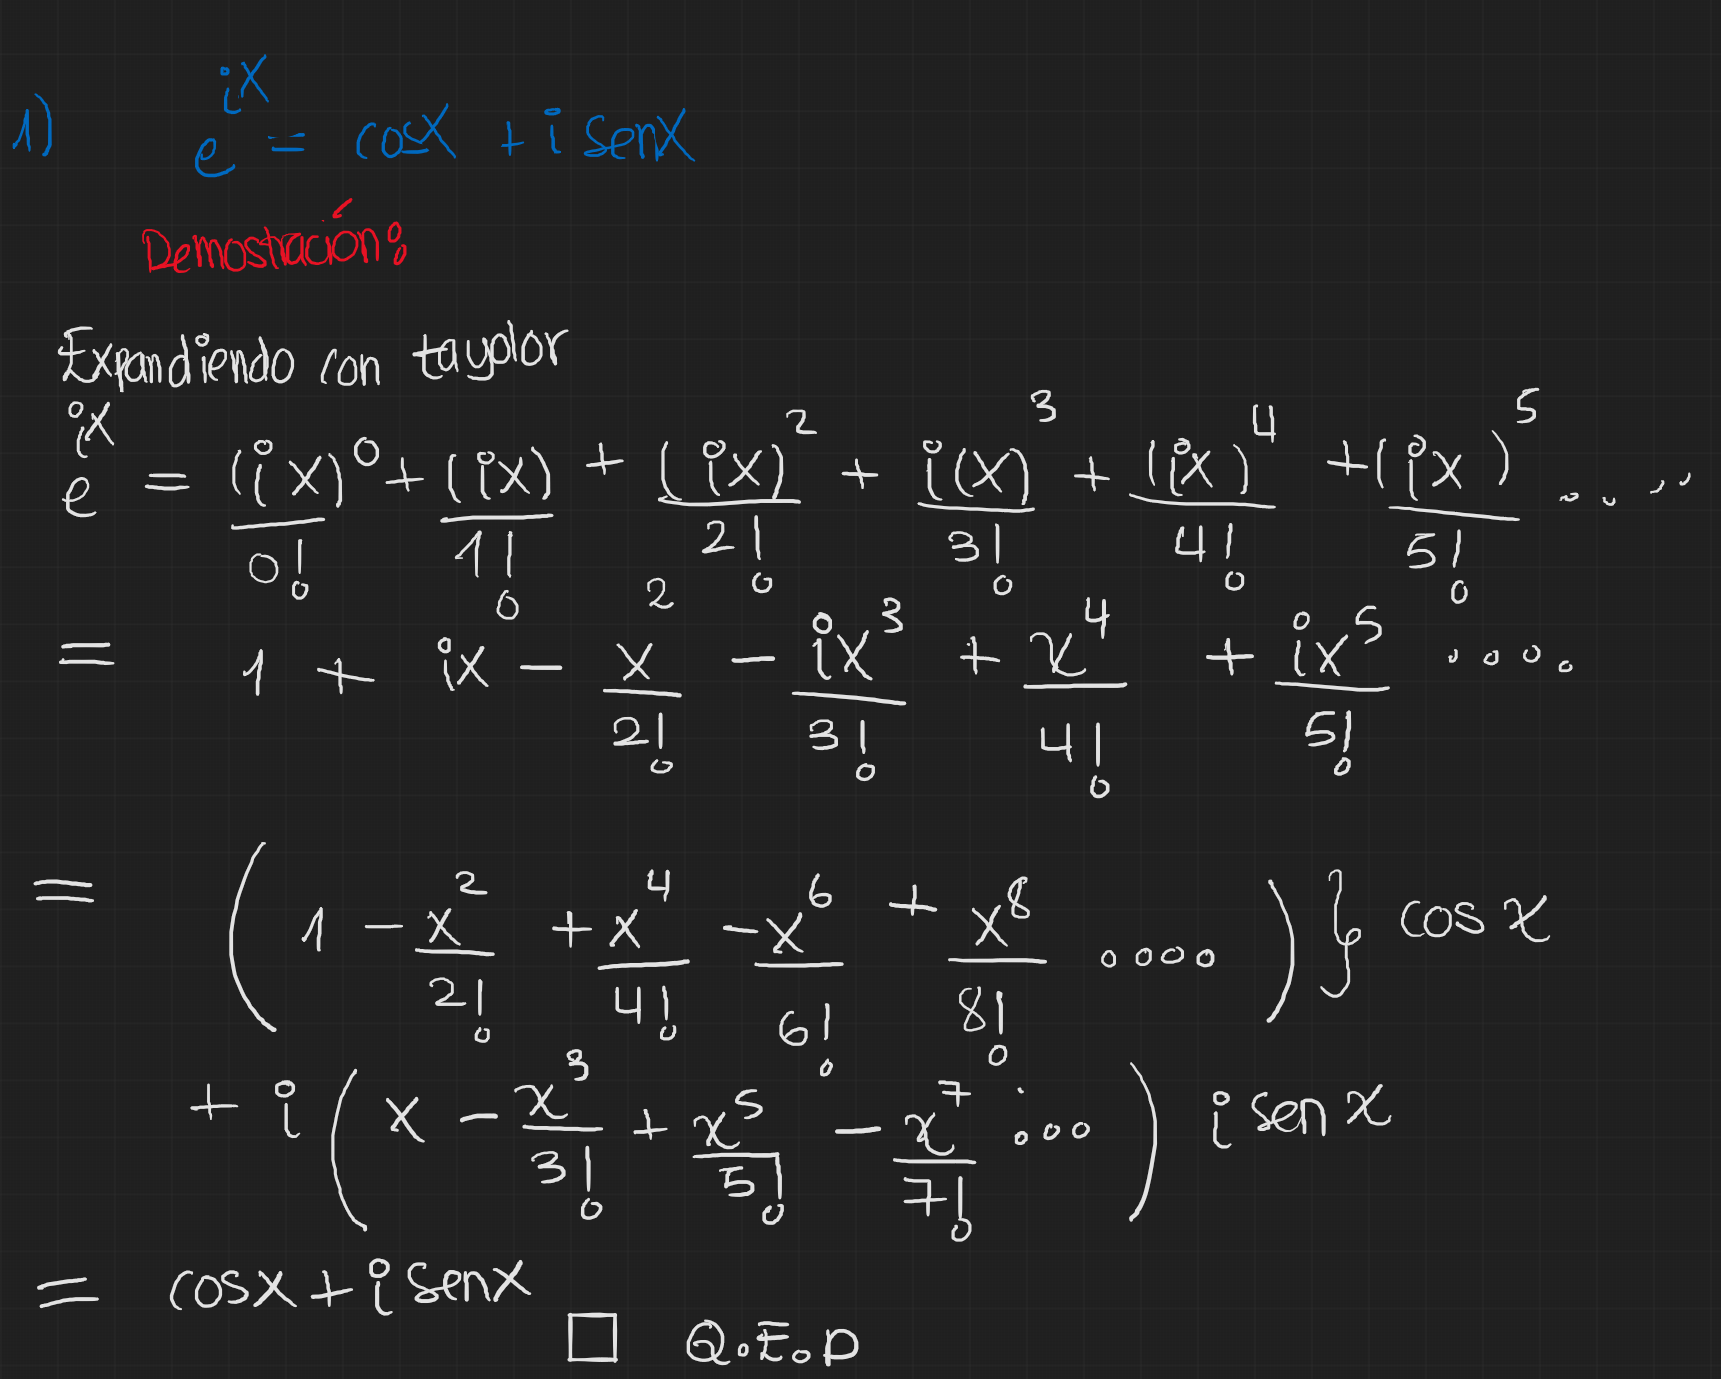

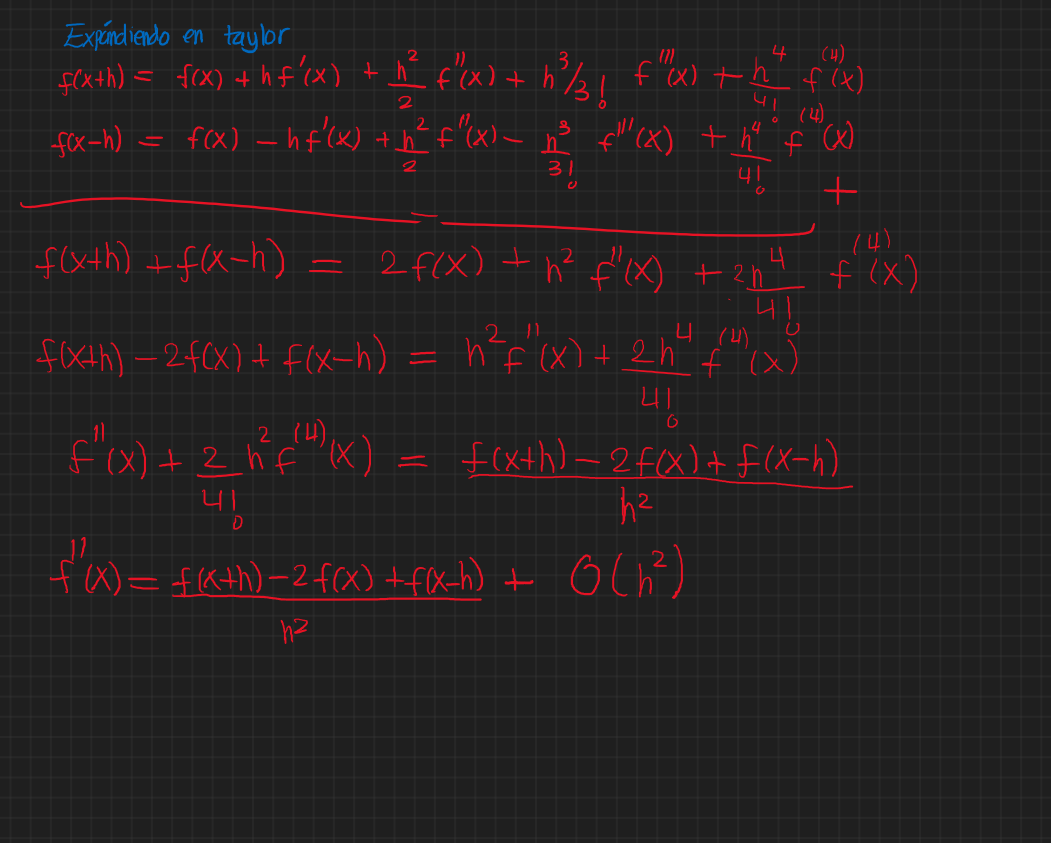

Error de orden h**2

# ------------------------------------------------------------------------------


## Problema 2

Considere el potencial electrico entre dos cargas de la misma magnitud pero de signo opuesto medido en la posición $\vec{r}$ desde el centro de coordenadas dado por,

$$ V(\vec{r}) = \frac{q}{4\pi \epsilon_0}\Bigg[\frac{1}{|\vec{r}-\vec{r_+}|}-\frac{1}{|\vec{r}-\vec{r_-}|}\Bigg], $$

donde $\vec{r_+}$, y $\vec{r_-}$, son las posiciones de las cargas positivas y negativas respectivamente. En este ejercicio solamente nos vamos a enfocar en las dimensiones $x$ y $y$.

Dados los siguientes parametros, 


$$\vec{r_+} = (-0.25\text{ m}, 0), \quad \vec{r_-} = (0.25\text{ m}, 0), \quad \frac{q}{4\pi \epsilon_0} = 1, $$


y que el campo electrico está dado por, 

$$\vec{E}(\vec{r}) = -\vec{\nabla} V(\vec{r}),$$

use la derivada central para graficar el campo electrico en el plano xy, gráfique en el plano $R \in [-1, 1] \times [-1, 1] \text{ m}$ con pasos de $0.1 \text{ m}$. Para la gráfica vectorial use, 
```
ax.quiver(x[i],y[j],Ex[i,j],Ey[i,j])
```
Al final el resultado debe ser similar al siguiente gráfico, 

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image5.png)

# SOLUCIÓN PROBLEMA 2

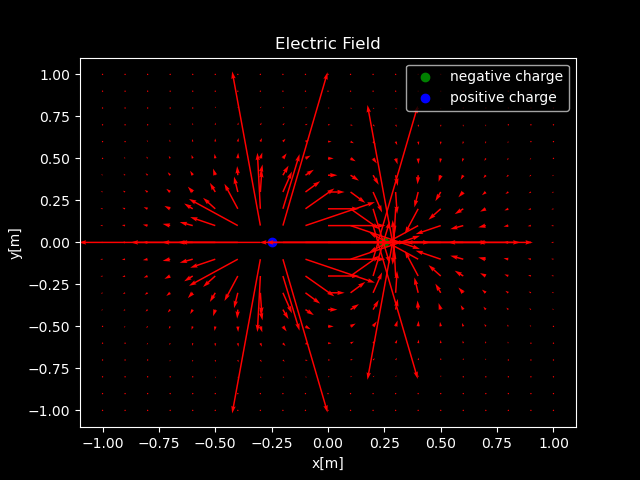

In [7]:
rmas = (-0.25, 0)
rmenos = (0.25, 0)


def f(x, y):  # función evaluada en el punto (x,y)
    r = (x, y)
    Δrmas = (r[0]-rmas[0], r[1]-rmas[1])
    Δrmenos = (r[0]-rmenos[0], r[1]-rmenos[1])
    normaΔrmas = (Δrmas[0]**2+Δrmas[1]**2)**(1/2)
    normaΔrmenos = (Δrmenos[0]**2+Δrmenos[1]**2)**(1/2)
    return (1/normaΔrmas)-(1/normaΔrmenos)


def grad_central(a, b, h):  # gradiente en (a,b)
    grad = [(f(a+h, b)-f(a-h, b))/(2*h), (f(a, b+h)-f(a, b-h))/(2*h)]
    grad = [grad[0]*-1, grad[1]*-1]
    return grad


# gráfico sin campo electrico
fig, ax = plt.subplots()
ax.set_xlabel('x[m]')
ax.set_ylabel('y[m]')
ax.scatter(rmenos[0], rmenos[1], color='green', label='negative charge')
ax.scatter(rmas[0], rmas[1], color='blue', label='positive charge')
ax.legend(loc='upper right')
ax.set_title('Electric Field')
# gráfico del campo electrico
x = np.linspace(-1, 1, 21)
y = np.linspace(-1, 1, 21)
X, Y = np.meshgrid(x, y)
grad = grad_central(X, Y, 0.1)
grad = grad_central(X, Y, 0.1)
ax.quiver(X, Y, grad[0], grad[1], color="red", width=0.003)

# ------------------------------------------------------------------------------

## Problema 3
Existe un punto magico entre la tierra y la Luna, llamado el punto Lagrangiano $L_1$. En este punto un satelite orbita la tierra de forma sincronica con la Luna a la velocidad angular $\omega$ de la Luna, manteniendose siempre entre los dos cuerpos celestes. Esto sucede porque la fuerza hacia adentro debido a la tierra y la fuerza hacia afuera debido a la Luna se combinan para crear exactamente la fuerza centripeta necesaria para mantener el satelite en su orbita. 

El dibujo se presenta a continuación:


![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image3.png)

Asumiendo que las orbitas son circulares, que la distancia entre el centro de la tierra y el centro de la Luna es $R$, y que la Tierra tiene una masa $M$ mucho mayor que la masa de la Luna $m$ y que la masa del satelite, encuentre la distancia $r$, con una precisión de $10^{-4}$, entre el centro de la Tierra y el satelite con el método de Newton-Raphson, la ecuación es de grado 5 y no se puede resolver facilmente de forma analitica. 

Considere los siguientes parametros:

$$ G = 6.674 \times 10^{-11} \quad [m^3kg^{-1}s^{-2}] $$
$$ M = 5.974 \times 10^{24} \quad [kg]$$
$$ m = 7.348 \times 10^{22} \quad [kg]$$
$$ R = 3.844 \times 10^{8} \quad [m]$$
$$ \omega = 2.662 \times 10^{-6} \quad [s^{-1}]$$

# SOLUCIÓN PROBLEMA 3

Referencias newton raphson:
http://www3.fi.mdp.edu.ar/analisis/temas/no_lineales_1/newtonRaphson.htm

Análisis físico-matemático:

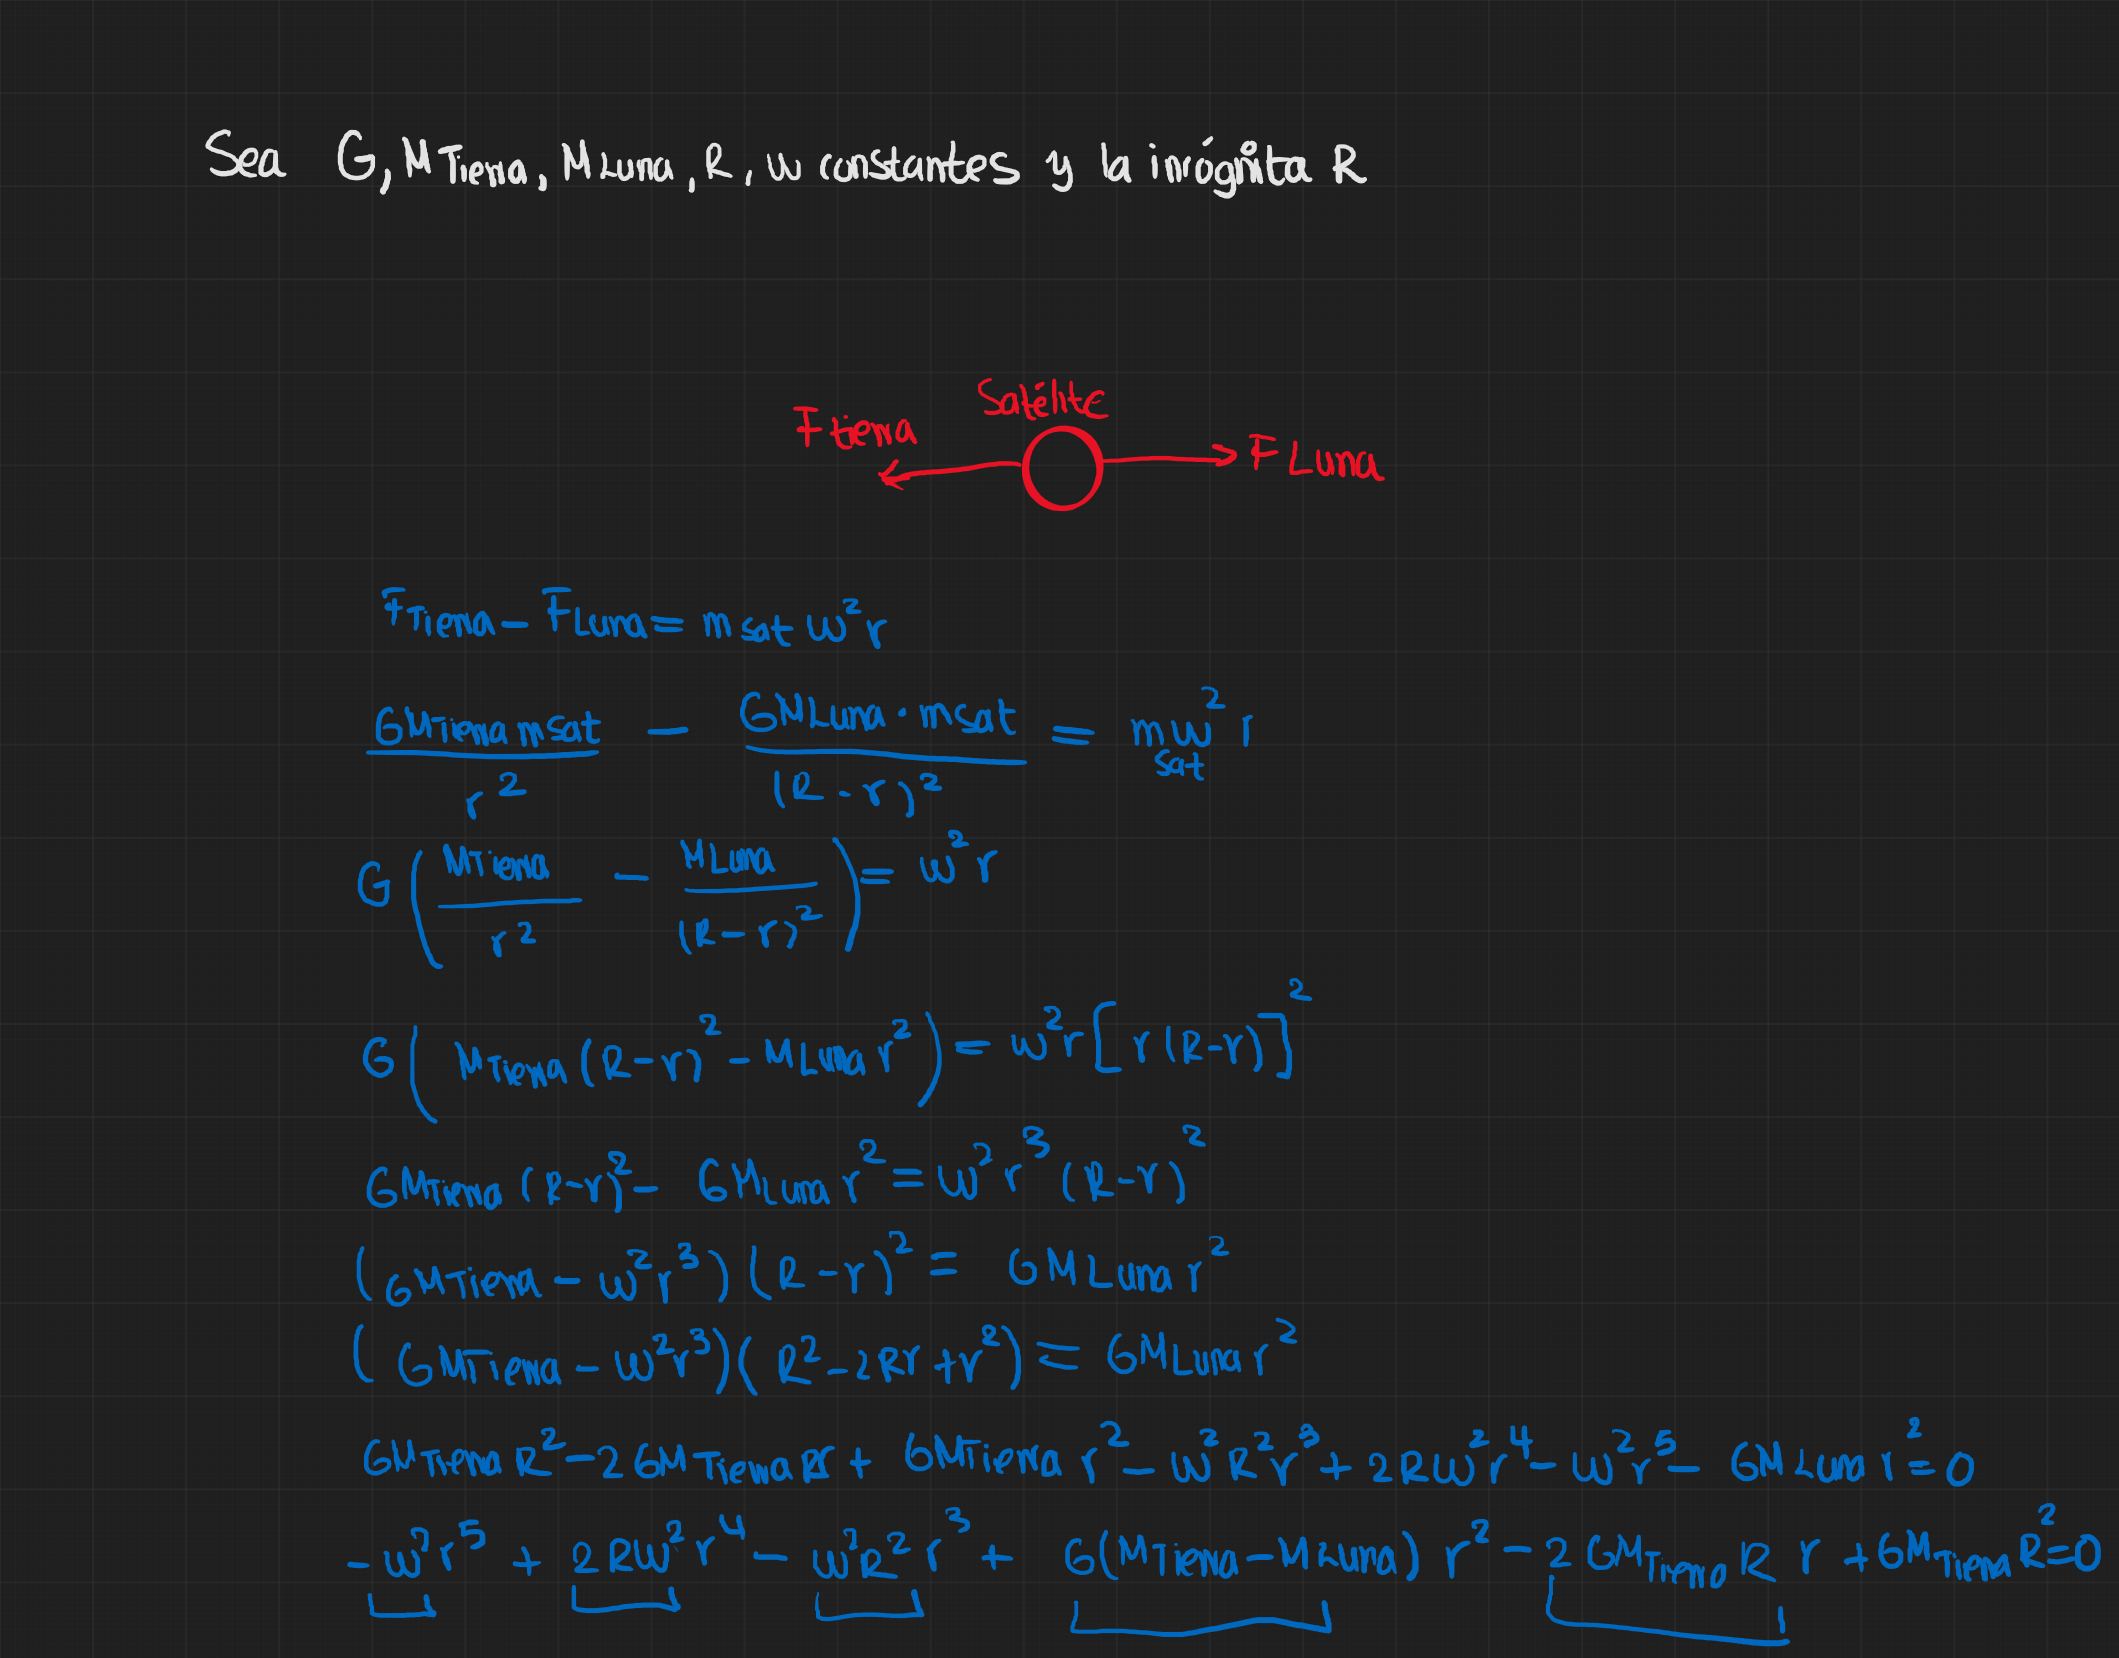

Definimos la función junto con su primera y segunda derivada:

In [8]:
G = 6.674e-11
M = 5.974e24
m = 7.348e22
R = 3.844e8
w = 2.662e-6
e = 1e-4


def funcion(r):
    a1 = -(w**2)*(r**5)
    a2 = 2*R*(w**2)*(r**4)
    a3 = -((w*R)**2)*(r**3)
    a4 = G*(M-m)*(r**2)
    a5 = -2*G*M*R*r
    a6 = G*M*(R**2)
    return a1+a2+a3+a4+a5+a6


def derivada(r):
    a1 = -(5*w**2)*(r**4)
    a2 = 4*2*R*(w**2)*(r**3)
    a3 = -((3*w*R)**2)*(r**2)
    a4 = 2*G*(M-m)*r
    a5 = -2*G*M*R
    return a1+a2+a3+a4+a5


def derivada2(r):
    a1 = -(4*5*w**2)*(r**3)
    a2 = 3*4*2*R*(w**2)*(r**2)
    a3 = -((2*3*w*R)**2)*(r)
    a4 = 2*G*(M-m)
    return a1+a2+a3+a4

Para asegurar la existencia(1) y convergencia(2 y 3) de la raíz en un intervalo [a,b] con el metódo de newton-raphson,debemos asegurar lo siguiente:

1) f(a)*f(b)<0 (Consecuencia trivial del teorema del valor intermedio)(Se deja al lector su demostración)

2)La función en ese intervalo no tiene derivada 0(ya que si esto pasa ocurre en la siguiente iteración una división por cero)

3)La función no tiene cambio de concavidad en ese intervalo( f''(x)>0 o f''(x)<0) para todo x en el intervalo, se adjunta explicación gráfica

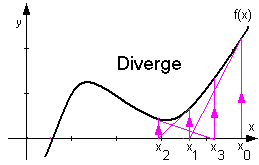

In [9]:
print('Condición 1(cumplida):')
print('Sea a=1 y b=R entonces:')
print('f(a)*f(b)=', funcion(1)*funcion(R))
print('-----------')
print('f(a)*f(b)<0 entonces la raíz existe en el intervalo [1,R]')

Condición 1(cumplida):
Sea a=1 y b=R entonces:
f(a)*f(b)= -4.2691388911365124e+61
-----------
f(a)*f(b)<0 entonces la raíz existe en el intervalo [1,R]


In [10]:
print('Condición 2(cumplida):')
x = True
for i in np.arange(1, R, 10e6):
    if derivada(i) == 0:
        x == False
if x == True:
    print('No hay derivada cero en el intervalo[1,R]')
if x == False:
    print('Hay una pendiente cero, el metódo no converge')

Condición 2(cumplida):
No hay derivada cero en el intervalo[1,R]


In [14]:
print('Condición 3(cumplida):')
x = True
auxiliar = derivada2(1)/abs(derivada2(1))
for i in np.arange(1, R, 10e6):
    if derivada2(i)/abs(derivada2(1)) != auxiliar:
        x == False
if x == True:
    print('No hay cambio de concavidad en el intervalo[1,R]')
if x == False:
    print('hay cambio de concavidad en el intervalo[1,R]')

Condición 3(cumplida):
No hay cambio de concavidad en el intervalo[1,R]


Tenemos asegurada la raíz y la convergencia del metódo en el intervalo, por ende procedemos a iniciar la iteración con x0=1.00m

In [15]:
print(round(Alg.newton_raphson_derivada_conocida(1, funcion, derivada)
      * (1/10**8), 2), 'm e8', 'es el punto deseado.')

3.26 m e8 es el punto deseado.
